# Video 2 - KNN Classification Model

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#changing the work directory
os.chdir('/Users/admin/Desktop/Synergyx Dataset')

In [40]:
#reading the data
data = pd.read_csv('Synergix_data_preprocessed_new.csv')
data.head()

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
1,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
2,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
4,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [4]:
#drop Units_sold column
data.drop(columns = 'Units_sold', axis = 1, inplace = True)

In [5]:
#check the data
data.head()

,Page_traffic,Unit_price,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,5835.0,22.214389,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
1,1881.0,11.870778,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,8.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
2,2477.0,27.645714,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,7.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3,4087.0,16.896848,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,7.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
4,1446.0,16.357664,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,8.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


## Good by Bad Ratings

As we observed from charts earlier in the course, rating coulmns in this dataset are cummulative whereas rest of the values are just for a particular week. This anomaly may negatively effect our ML models. To bring more value out of the ratings columns, we can find the ratio between good and bad ratings. A ratio would not be cummulative and would show the proportion of good ratings over bad ratings just for a particular week. Let's add the 4_Star_Rating and 5_Star_Rating to get the sum of good ratings and 1_Star_Rating and 2_Star_Rating to get the sum of bad ratings. We can consider 3_Star_Rating as neutral and not use it to calculate the Good_By_Bad_Rating.

For this we will create a for loop that calculates the ratio of good and bad ratings. This code is a bit complex and takes care of various scenarios such as zero division error. The detailed explanation to the code is given below.

In [6]:
#Storing the ratio in a list named Rating_ratio
Rating_ratio = []
for row in data.values:
    if(row[3]+row[4] == 0):
        if(row[6]+row[7] == 0):
            #If all the ratings are zero then overall rating ratio will also be zero
            Rating_ratio.append(0.0)
        else:
            #If only the numerator(1 and 2 star) ratings are zero then add -99999 to the list temporarily which 
            #will be taken care of in the next part of the code
            Rating_ratio.append(-99999)
    else:
        Rating_ratio.append((int(row[6])+int(row[7]))/(int(row[4])+int(row[3])));
              

#replacing -99999 with the maximum rating in the list
max_rating = max(Rating_ratio)
for x in range(len(Rating_ratio)):
    if(Rating_ratio[x] == -99999):
        Rating_ratio[x] = max_rating

#### Explanation-

1. The code snippet initializes an empty list called Rating_ratio.

2. It iterates over each row within data.values, and extracts the data as a NumPy array for iteration.

3. For each row, it checks whether the sum of the values in the 4th and 5th columns is zero. If this sum is zero, the following logic applies:

    -If the sum of the values in the 7th and 8th columns is __also zero__, it appends 0.0 to Rating_ratio. This 
    case represents an item with no ratings, thus a zero ratio is appended.

    -If the sum of the values in the 7th and 8th columns is not zero, it appends a placeholder value of -99999 to
    Rating_ratio. This placeholder indicates that there are ratings present, but since the lower ratings
    (presumably 1 and 2 stars) are zero, the ratio cannot be calculated at this point. This
    will be handled in the next part of the code.
    

4. If the sum of the values in the 4th and 5th columns is not zero, it calculates the ratio of the sum of values in the 7th and 8th columns to the sum of values in the 4th and 5th columns. This calculated ratio is then appended to Rating_ratio.

After calculating these ratios and placeholders, the code proceeds with a second operation to replace -99999 values with the Max Rating. __This is because items with no low ratings (denominator is zero) should be given the highest possible ratio score from the dataset.__:

5. The final list Rating_ratio will thus contain either calculated ratios or the maximum ratio found in the data, with no undefined or infinite values due to division by zero. 

In [7]:
#adding the column 'Good_By_Bad_Rating' to the dataframe
data['Good_By_Bad_Rating'] = Rating_ratio

In [8]:
#drop the rating columns
data.drop(columns = ['1_Star_Rating', '2_Star_Rating', '3_Star_Rating', '4_Star_Rating', '5_Star_Rating'], inplace = True)

In [9]:
#check the dataset
data.head().transpose()

,0,1,2,3,4
Page_traffic,5835.0,1881.0,2477.0,4087.0,1446.0
Unit_price,22.214389,11.870778,27.645714,16.896848,16.357664
Segment,Skincare,Skincare,Makeup,Makeup,Hair Care
Image_Count,6.0,9.0,10.0,5.0,0.0
Bullet_Count,6.0,8.0,7.0,7.0,8.0
Title_Count,89.0,126.0,152.0,117.0,165.0
Description_Length,141.0,149.0,186.0,209.0,158.0
num_unique_Search_Terms,3.0,13.0,4.0,7.0,4.0
Organic Search Rank,3.0,16.0,20.0,20.0,16.0
Num_of_Promotions,0.0,0.0,0.0,0.0,0.0


In [10]:
#get the category names
data['Segment'].unique()

array(['Skincare', 'Makeup', 'Hair Care'], dtype=object)

Primarily there are 2 ways to encode a column and they are- 
1. One-hot Encoding and
2. Label Encoding

One-hot encoding creates binary columns for each category with only one active state,for e.g., our Segment column will first be split into 3 columns- 'Skincare', 'Makeup' and 'Hair Care'. When the 'Skincare' column has '1' in it, it means that product belonged to the Skincare category and automatically the other 2 columns 'Hair Care' and 'Makeup' will be '0'. One-hot encoding indicates there is no order or ranking amongst the categories in that variable.

![Image Description](OneHotEncoding.png)

On the other hand, Label encoding assigns a numerical value to each unique category. If the segments were placed in an order, for eg: let's say 'Skincare' is the most superior segment, followed by 'Hair Care' and then 'Makeup', Once the label encoding is completed, it will convert the values into- 1, 2, and 3 implying __Skincare__ is superior to __Hair Care__ which inturn is superior to __Makeup__. Label encoding implies there is an order or rank that can be given to the categories.

![Image Description](LabelEncoding.png)

Since the categories in the 'Segments' in the Synergix dataset do not have any rankings or order amongst themselves, we will perform One-hot Encoding.

## One-hot Encoding

In [11]:
#one-hot encoding
data = pd.get_dummies(data, columns = ['Segment'], prefix = 'Segment', drop_first = True)
data.head()

,Page_traffic,Unit_price,Image_Count,Bullet_Count,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,Sum of Spend,...,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000,Good_By_Bad_Rating,Segment_Makeup,Segment_Skincare
0,5835.0,22.214389,6.0,6.0,89.0,141.0,3.0,3.0,0.0,0.0,...,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1,21.783626,False,True
1,1881.0,11.870778,9.0,8.0,126.0,149.0,13.0,16.0,0.0,0.0,...,75868.0,2.0,0.0,0.00,0.0,0.0,0,18.397906,False,True
2,2477.0,27.645714,10.0,7.0,152.0,186.0,4.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0,20.274611,True,False
3,4087.0,16.896848,5.0,7.0,117.0,209.0,7.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,1,16.171233,True,False
4,1446.0,16.357664,0.0,8.0,165.0,158.0,4.0,16.0,0.0,0.0,...,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0,26.811321,False,False


<h2>Performing Train Test Split</h2>

In [12]:
#Separating the independent and target variables
y = data['Units_sold>1000']
X = data.drop(columns = ['Units_sold>1000'], axis = 1)

In [13]:
#Quick look at the shape of the data
X.shape, y.shape

((19631, 21), (19631,))

In [15]:
#import train test split
from sklearn.model_selection import train_test_split

In [16]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
#A quick look at the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13741, 21), (5890, 21), (13741,), (5890,))

<h2>Feature Scaling</h2>

In [18]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

The StandardScaler is a tool that will be used to standardize the data—that is, to adjust the features of the data so that they have a mean of 0 and a standard deviation of 1. 

![Image Description](standard_scaler.png)

Now create an object called scaler that is an instance of the StandardScaler class

In [19]:
#create an instance for StandardScaler
scaler = StandardScaler()

In the next step we take the training data, X_train, and applies two steps to it - 'fit' and 'trandform'.
1. the 'fit' method in the scaler calculates the mean and standard deviation for each feature in the training dataset.
2. and 'transform' uses these values to scale the training data, subtracting the mean and dividing by the standard deviation for each feature. The result is a new version of the training data where each feature now has a mean of 0 and a standard deviation of 1. This scaled data is stored in X_train_scaled

In [20]:
#let's transform the train data
X_train_scaled = scaler.fit_transform(X_train)

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

In [21]:
#check X_train_scaled
X_train_scaled

array([[ 9.90904284e-04,  4.21592655e-01,  8.49091590e-01, ...,
        -3.73875717e-02,  9.18120514e-01, -6.87701870e-01],
       [ 3.12135911e-01,  9.81193880e-02,  2.35826542e-01, ...,
        -1.02098342e+00,  9.18120514e-01, -6.87701870e-01],
       [-3.87111076e-01,  5.35315189e-01,  4.40248225e-01, ...,
        -5.48287256e-01,  9.18120514e-01, -6.87701870e-01],
       ...,
       [-3.40008100e-01,  1.63678075e-01, -1.39954692e+00, ...,
        -2.47040728e-01,  9.18120514e-01, -6.87701870e-01],
       [-1.19184219e+00,  4.38805436e-01,  4.40248225e-01, ...,
        -1.48075135e+00,  9.18120514e-01, -6.87701870e-01],
       [-1.91298211e+00,  2.89487459e+00,  6.44669908e-01, ...,
         4.19829879e-01, -1.08918163e+00,  1.45411848e+00]])

In [26]:
X_train_scaled.shape

(13741, 21)

And now let us transform the test data using .transform. This takes the test data, X_test, and scales it using the mean and standard deviation values computed from the __training data__. It's important to note that we only transform the test data without fitting the scaler to it. This is because the test data should be scaled using the parameters from the training data to ensure consistency and to prevent data leakage.

In [27]:
X_test_scaled = scaler.transform(X_test)

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [28]:
X_test_scaled

array([[ 0.89130348,  0.60472504,  0.44024822, ..., -1.48075135,
        -1.08918163,  1.45411848],
       [-0.20732366, -0.15943628, -1.39954692, ..., -1.48075135,
         0.91812051, -0.68770187],
       [-1.57861733,  0.45159198, -1.39954692, ...,  0.57902643,
        -1.08918163, -0.68770187],
       ...,
       [-0.73341746,  0.49783078,  0.23582654, ..., -0.05769711,
         0.91812051, -0.68770187],
       [-0.90988776,  0.25377995,  0.64466991, ...,  1.46788558,
         0.91812051, -0.68770187],
       [ 3.0388011 , -0.58786969,  0.03140486, ..., -1.48075135,
         0.91812051, -0.68770187]])

<h2>KNN Model</h2>

In [29]:
#import the necessary class
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#setting the value k or neighbors at 5
knn_model = KNeighborsClassifier()

In [31]:
#training the knn model with train data
knn_model.fit(X_train_scaled, y_train)

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier()

In [32]:
#making predictions on the same training data
y_train_pred = knn_model.predict(X_train_scaled)

Predicting on the test data gives us a sense of how well the model can generalize to new data that it wasn't trained on. This is a crucial step in machine learning, as it helps assess the model's performance and whether it's likely to perform well on real-world data, outside of the training set.

In [33]:
#making predictions on the test data based on the learniing from fitting model on the train data
y_pred = knn_model.predict(X_test_scaled)

<h2>Evaluating the Model</h2>

In [34]:
#import accuracy score
from sklearn.metrics import accuracy_score

In [35]:
#getting accuracy_score for train and test data
train_accuracy_score = accuracy_score(y_train, y_train_pred)
test_accuracy_score = accuracy_score(y_test, y_pred)

print('Train Accuracy Score: ', train_accuracy_score)
print('Test Accuracy Score: ', test_accuracy_score)

Train Accuracy Score:  0.8879994178007423
Test Accuracy Score:  0.8288624787775891


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

# Video 3 - Choosing the right value of K

<p style = 'color:green'><b>Run all the cells above before you begin</b><p>

In [36]:
#for loop to get accuracy scores for train and test for k values ranging from 1 to 51
train_accuracy_score = []
test_accuracy_score = []
for n in range(1,51):
    
    knn_model = KNeighborsClassifier(n_neighbors = n)
    knn_model.fit(X_train_scaled, y_train)
    
    y_train_pred = knn_model.predict(X_train_scaled)
    y_pred = knn_model.predict(X_test_scaled)
    
    train_accuracy_score.append(accuracy_score(y_train, y_train_pred))
    test_accuracy_score.append(accuracy_score(y_test, y_pred))

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

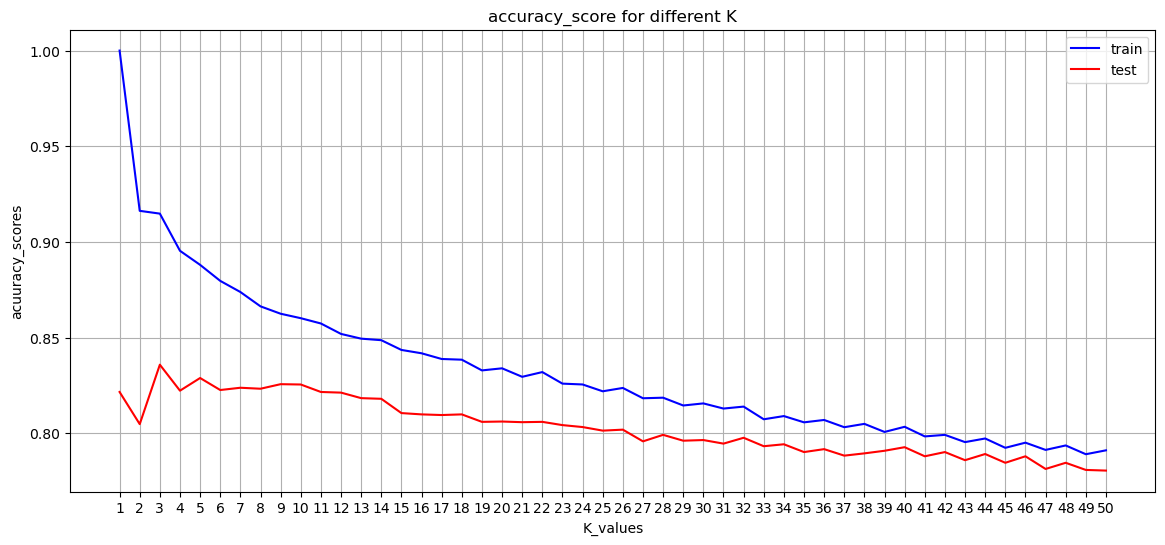

In [37]:
#plot the accuracy scores
plt.figure(figsize = (14,6))
plt.title('accuracy_score for different K')
plt.plot(np.arange(1, len(train_accuracy_score)+1), train_accuracy_score, color = 'blue', label = 'train')
plt.plot(np.arange(1, len(train_accuracy_score)+1), test_accuracy_score, color = 'red', label = 'test')
plt.xticks(np.arange(1, len(train_accuracy_score)+1))
plt.xlabel('K_values')
plt.ylabel('acuuracy_scores')
plt.legend()
plt.grid()
plt.show()